In [17]:
import torch

import phys_torch
from helper import plotscalar, plotvector

In [18]:
tt = torch.linspace(-torch.pi, torch.pi, 50)
grid = torch.tensor([(x, y) for x in tt for y in tt], requires_grad=True)

In [19]:
def funcvector(inputs: torch.Tensor):
    x, y = inputs.T
    return torch.stack((x.sin()**2,  y.cos())).T

divFv, Fv = phys_torch.div(funcvector, return_value=True)(grid)

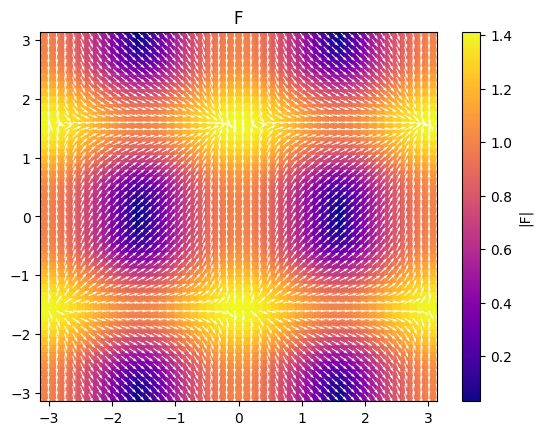

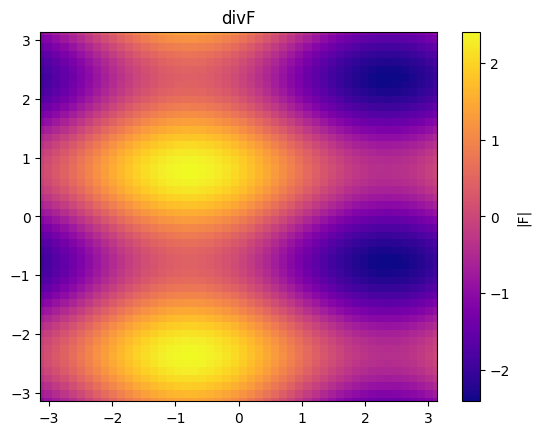

In [20]:
plotvector(grid, Fv, "F")
plotscalar(grid, divFv, "divF")

In [21]:
def funcscalar(inputs: torch.Tensor):
    x, y = inputs.T
    return x**3 + y.exp()

gradFs, Fs = phys_torch.grad(funcscalar, return_value=True)(grid)

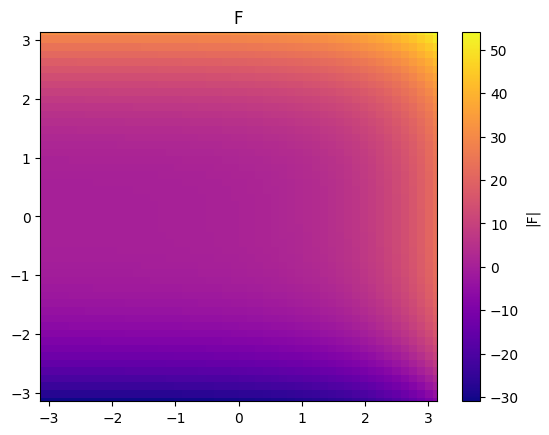

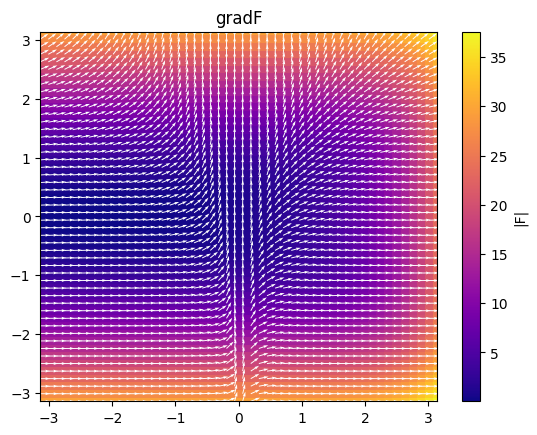

In [22]:
plotscalar(grid, Fs, "F")
plotvector(grid, gradFs, "gradF")

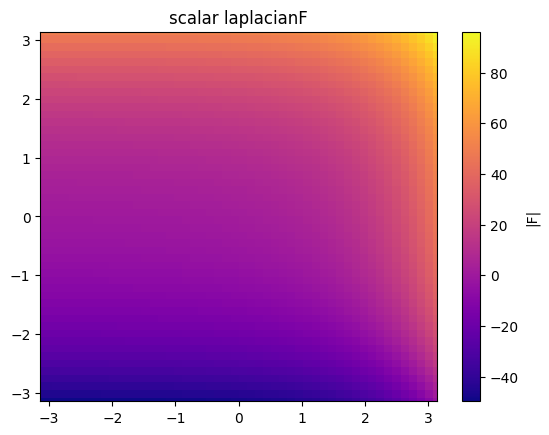

In [23]:
scalar_laplacianF = phys_torch.div(phys_torch.grad(funcscalar))(grid)
plotscalar(grid, scalar_laplacianF, "scalar laplacianF")

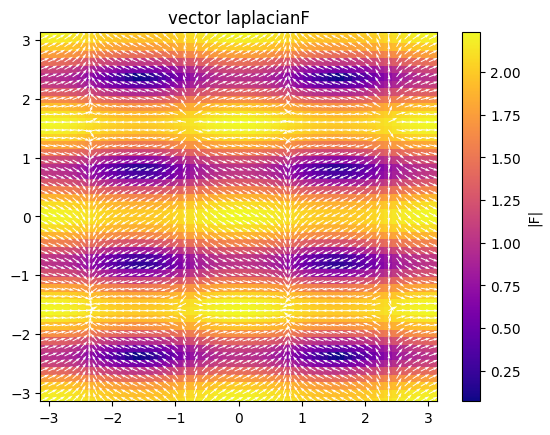

In [24]:
vector_laplacianF = phys_torch.grad(phys_torch.div(funcvector))(grid)
plotvector(grid, vector_laplacianF, "vector laplacianF")